# Using FastAI to make image predictions

So far we have only used Tensorflow and Keras to build Neural Netowors 
while in this notebook we will take a quick glance of the FastAI Library.

FastAI is a a reasearch lab and also python library which aims to
provide a simple and easily accessible way to build ML models.

The approch followin is top - down: Meaning starting from a relatively
abstact and simple to use high level API while eventually we can 
specialize our development to fit our dataset specific complexities.

Using FastAI we can easily create a model with a few lines of code
since it has several conventions build in to its implemenation that 
make it ideal for quick prototypes and proofs of concept.

In [1]:
from fastai.vision.all import *


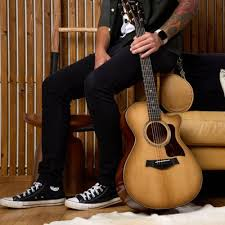

In [2]:
path = Path("./data/guitars/training")
files = get_image_files(path)
PILImage.create(np.random.choice(files))

In [3]:
db = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        get_y=parent_label,
        splitter  = RandomSplitter(),
        item_tfms = Resize(224),
        batch_tfms=aug_transforms()
        )

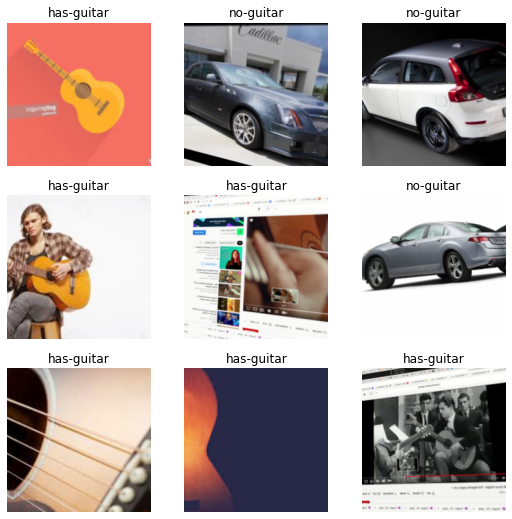

In [4]:
dls = db.dataloaders(path, bs=32)
dls.show_batch()

In [5]:
learn = vision_learner(dls,
                       resnet34, 
                       loss_func=LabelSmoothingCrossEntropyFlat(),
                       cbs=[GradientAccumulation(32),
                            GradientClip()],
                       metrics=[accuracy, error_rate]
                      )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
learn.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.628743,0.354606,0.990000,0.010000,00:06


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.418582,0.283503,0.985000,0.015000,00:04
1,0.408689,0.291883,0.990000,0.010000,00:04
2,0.390884,0.298312,0.985000,0.015000,00:04
3,0.368397,0.279800,0.985000,0.015000,00:04
4,0.348798,0.266306,0.985000,0.015000,00:04
5,0.334666,0.253119,0.995000,0.005000,00:04
6,0.324160,0.238611,0.995000,0.005000,00:04
7,0.316074,0.254211,0.990000,0.010000,00:04
8,0.303005,0.246464,0.995000,0.005000,00:04
9,0.294392,0.243985,0.990000,0.010000,00:04


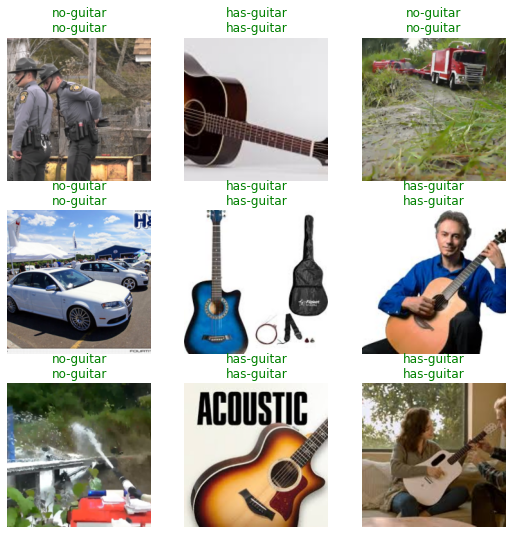

In [7]:
learn.show_results()

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

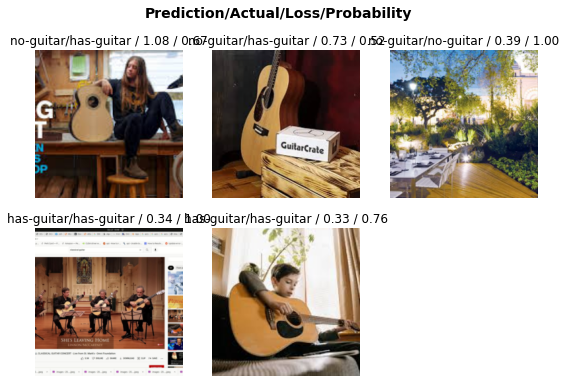

In [9]:
interp.plot_top_losses(5)

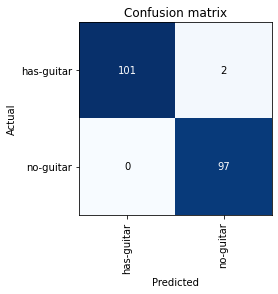

In [10]:
interp.plot_confusion_matrix()